In [1]:
import warnings
import pandas as pd 
import seaborn as sea
import matplotlib.pyplot as plt

In [2]:
warnings.filterwarnings('ignore',category=FutureWarning)
warnings.filterwarnings('ignore',category=UserWarning)

In [3]:
from yellowbrick.classifier import (
    ROCAUC,
    PrecisionRecallCurve
)
from imblearn.under_sampling import RandomUnderSampler

In [4]:
from sklearn.neighbors       import KNeighborsClassifier
from sklearn.model_selection import (
    train_test_split,
    GridSearchCV    ,
    StratifiedKFold
    )
from sklearn.metrics         import *
from sklearn.datasets        import fetch_openml

In [5]:
mnist = fetch_openml('mnist_784',version=1)

In [6]:
X:pd.DataFrame = mnist['data']
Y:pd.DataFrame = mnist['target'].astype(int)

In [7]:
under = RandomUnderSampler(random_state=0)

In [8]:
Xunder , Yunder = under.fit_resample(X,Y)

In [9]:
xtrain , xtest , ytrain , ytest = train_test_split(Xunder,Yunder,train_size=0.2,random_state=0)

In [24]:
params = dict(
    n_neighbors = [9,11],
    weights     = ['distance'] 
)
gridKnn = GridSearchCV(KNeighborsClassifier(),param_grid=params,scoring='accuracy',cv=2,n_jobs=2,verbose=1) 
gridKnn.fit(X,Y)

Fitting 2 folds for each of 2 candidates, totalling 4 fits


In [11]:
print(gridKnn.best_estimator_)
print(gridKnn.best_score_)

KNeighborsClassifier(n_neighbors=9, weights='distance')
0.9635989228575954


In [19]:
knn = KNeighborsClassifier(n_neighbors=9,weights='distance')

In [20]:
knn.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=9, weights='distance')

In [21]:
pred = knn.predict(xtest)

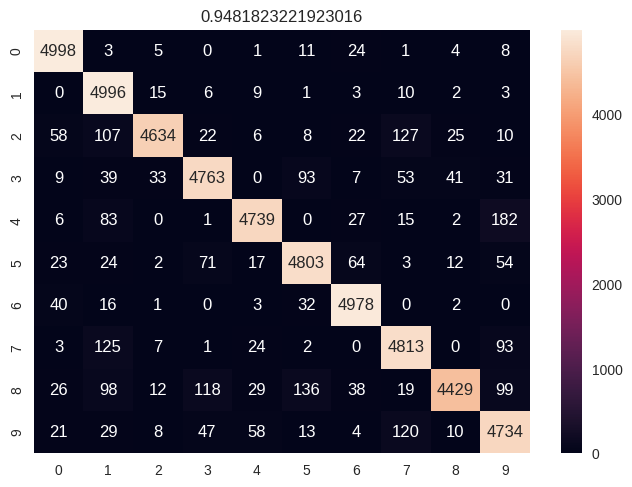

In [22]:
sea.heatmap(confusion_matrix(ytest,pred),annot=True,fmt='')
plt.title(accuracy_score(ytest,pred))
plt.show()

In [23]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      5055
           1       0.91      0.99      0.95      5045
           2       0.98      0.92      0.95      5019
           3       0.95      0.94      0.94      5069
           4       0.97      0.94      0.95      5055
           5       0.94      0.95      0.94      5073
           6       0.96      0.98      0.97      5072
           7       0.93      0.95      0.94      5068
           8       0.98      0.89      0.93      5004
           9       0.91      0.94      0.92      5044

    accuracy                           0.95     50504
   macro avg       0.95      0.95      0.95     50504
weighted avg       0.95      0.95      0.95     50504



In [17]:
kfold = StratifiedKFold(4,shuffle=True,random_state=5) 

for train , test in kfold.split(X,Y):
    Xfold , Yfold  = X.iloc[train], Y.iloc[test]

    
    under = RandomUnderSampler(random_state=0)
    Xunder , Yunder = under.fit_resample(Xfold,Yfold)

    xtrainf , xtestf , ytrainf , ytestf = train_test_split(Xunder,Yunder,)